In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


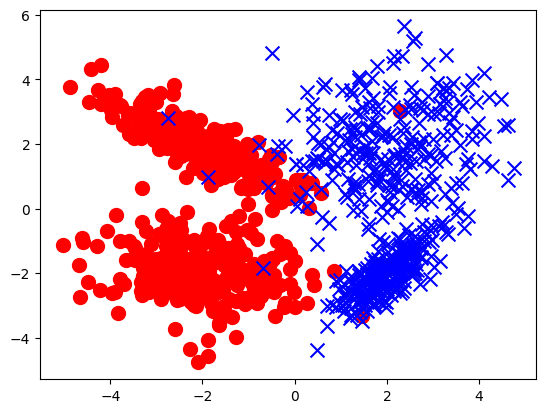

In [4]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        # Task 4
        # X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [6]:
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [7]:
logreg = LogReg()

In [8]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [9]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [10]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [11]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [12]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

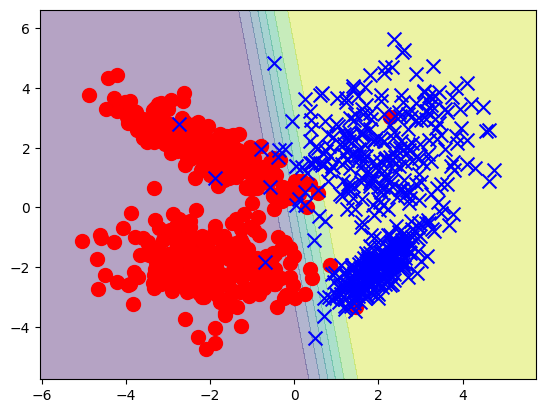

In [13]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

# Using sklearn funcitons

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(X, y)
y_pred_lr = model.predict(X)

# Metrics for library model

In [16]:
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'Библиотечная модель - Accuracy: {ac:.2f}, F1-score: {f1:.2f}')

Библиотечная модель - Accuracy: 0.98, F1-score: 0.98


# Task 1

In [23]:
xx, yy = np.meshgrid(
    np.linspace(X[:, 1].min() - 2, X[:, 1].max() + 2, 200), 
    np.linspace(X[:, 2].min() - 2, X[:, 2].max() + 2, 200)
)

XX = np.c_[xx.ravel(), yy.ravel()]
XX = np.c_[np.ones(XX.shape[0]), XX]

Z = model.predict_proba(XX)[:, 1]
Z = Z.reshape(xx.shape)

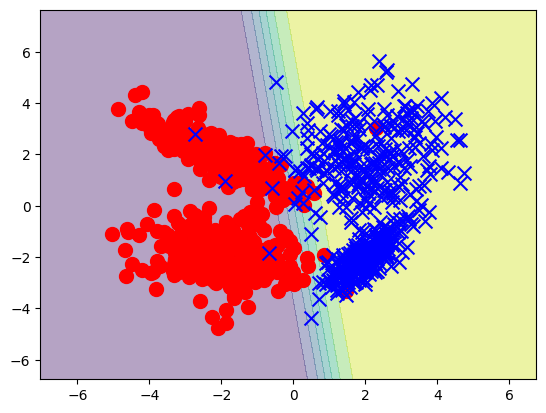

In [24]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c='b', s=100)
plt.show()

# Task 2

In [38]:
alphas = [0.01, 0.1, 0.23, 0.5, 0.93, 1, 10]
for alpha in alphas:
    logreg = LogReg(alpha=alpha)
    X_with_bias = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    try:
        logreg.fit(X_with_bias, y)
        y_pred = logreg.predict(X_with_bias)
        accuracy = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        print(f"Alpha={alpha} -> accuracy={accuracy:.2f}, F1-score={f1:.2f}")
    except Exception as e:
        print(f"Alpha={alpha} -> Ошибка: {e}")

Alpha=0.01 -> accuracy=0.97, F1-score=0.97
Alpha=0.1 -> accuracy=0.98, F1-score=0.98
Alpha=0.23 -> accuracy=0.98, F1-score=0.98
Alpha=0.5 -> accuracy=0.98, F1-score=0.98
Alpha=0.93 -> accuracy=0.98, F1-score=0.98
Alpha=1 -> accuracy=0.98, F1-score=0.98
Alpha=10 -> accuracy=0.98, F1-score=0.98


# Task 4

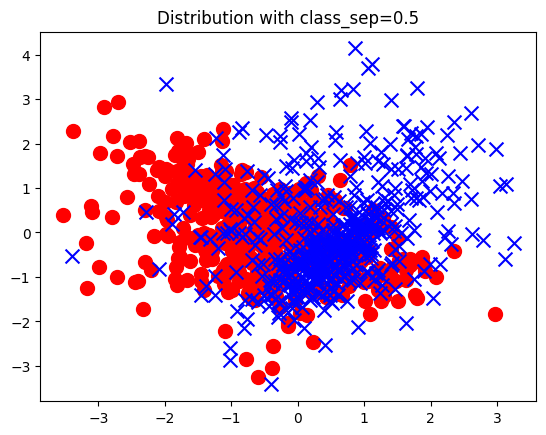

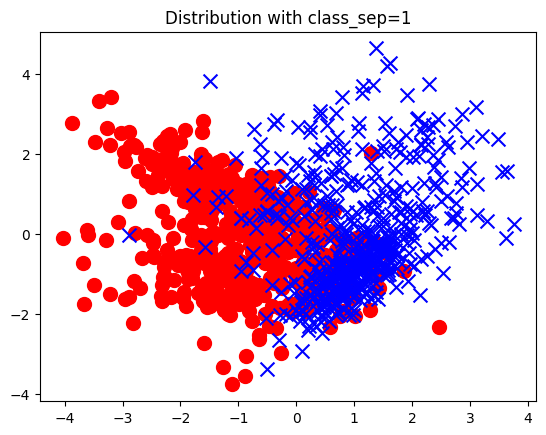

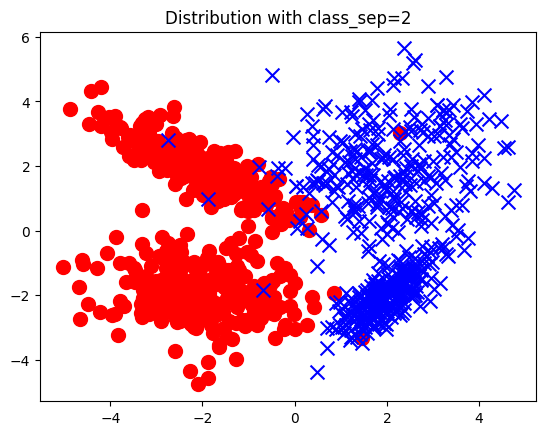

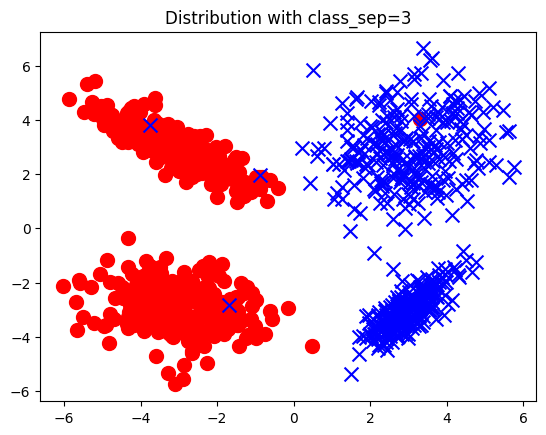

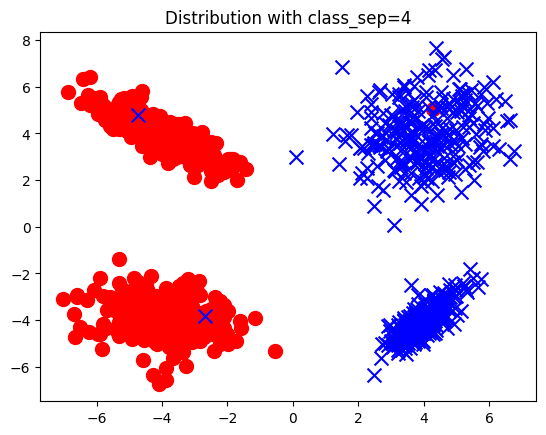

In [39]:
class_seps = [0.5, 1, 2, 3, 4]
for class_sep in class_seps:
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=class_sep,
        random_state=1
    )
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
    plt.title(f'Distribution with class_sep={class_sep}')
    plt.show()

### Чем больше значение, тем более четко разделяются классы, и тем проще будет их классифицировать.

# Task 5

In [42]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    class_sep=2,
    random_state=1
)

In [43]:
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)

accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'accuracy = {accuracy:.2f} F1-score = {f1:.2f}')

accuracy = 0.99 F1-score = 0.99


# Task 6

In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=5,
    class_sep=2,
    random_state=1
)

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')

print(f'accuracy = {accuracy:.2f} F1-score = {f1:.2f}')

accuracy = 0.86 F1-score = 0.87


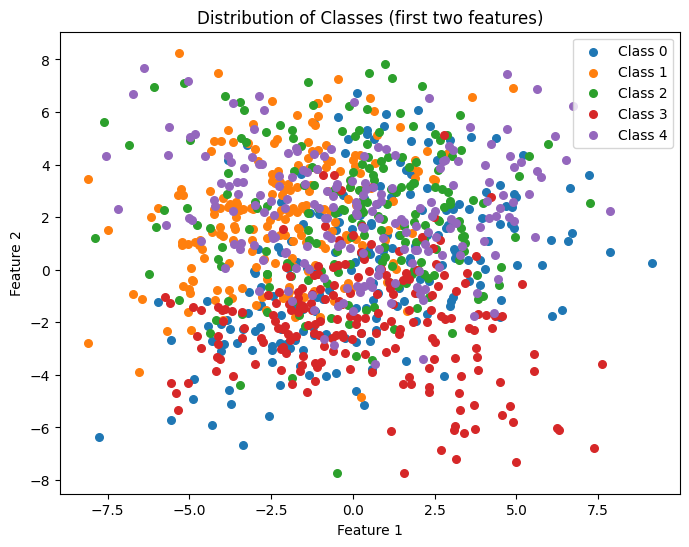

In [47]:
plt.figure(figsize=(8, 6))

for class_label in range(5):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {class_label}', s=30)

plt.title('Distribution of Classes (first two features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Task 7

In [49]:
y_pred_proba = model.predict_proba(X)

print(y_pred_proba[:5])

[[1.76430247e-02 5.26342814e-03 3.41636663e-04 9.70147067e-01
  6.60484351e-03]
 [1.15905045e-01 9.44080156e-02 3.03676560e-02 2.52296632e-03
  7.56796317e-01]
 [3.40256697e-03 9.88012255e-01 2.26523983e-06 4.84739759e-03
  3.73551524e-03]
 [6.78485952e-01 2.40211502e-02 8.66082650e-04 8.07627282e-03
  2.88550543e-01]
 [5.92114988e-03 4.06929352e-03 1.79182365e-02 9.70994598e-01
  1.09672182e-03]]
